In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from model import Model
from IPython import display
import cv2
from utils import depth2disp

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 5)


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.empty_cache()

Use a dataset with 45 instances
Batch size 16
Drop last True
Use a dataset with 180 instances
Batch size 16
Drop last True
Epoch:   0 G: [2.87386057 0.         0.23931372 0.56428065] Time: 9.76s
      Test G: [2.02778134 0.         0.16142402 0.55159535] 2.741(2.741) Time: 3.65s [S]


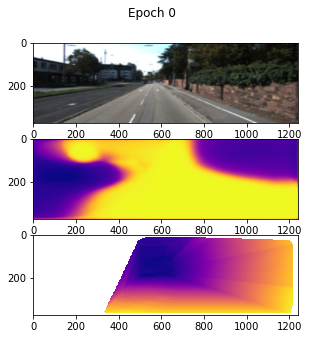

Epoch:   1 G: [2.83839692 0.         0.21447819 0.49313635] Time: 8.61s
      Test G: [1.92584381 0.         0.1580697  0.49904804] 2.583(2.583) Time: 3.01s [S]


KeyboardInterrupt: 

In [4]:
# Train

model = Model(
    use_multiple_gpu=False,
    model_path='model_013_pretrain',
    batch_size=16,
    val_dataset_dir='data_depth_annotated/val',
    train_dataset_dir='data_depth_annotated/train',
    input_height=128,
    input_width=256,
    learning_rate=1e-3,
    loss_weights=[1.0, 0.0, 1.0, 1.0] # no supervised loss
)

fig, ax = plt.subplots(ncols=1, nrows=3)
epochs = 180
idx = 0

for epoch in range(epochs):
    model.train(epoch)
    fig.suptitle('Epoch {}'.format(epoch))

    disp_est, left, gt = model.test(epoch, save=True)

    resized_left = cv2.resize(np.moveaxis(left[idx], 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_disp_est = cv2.resize(np.abs(disp_est[idx]), (1242, 375), interpolation=cv2.INTER_LINEAR)
    resized_gt = cv2.resize(np.moveaxis(depth2disp(gt[idx]), 0, -1), (1242, 375), interpolation=cv2.INTER_LINEAR)
    ax[0].imshow(resized_left)
    ax[1].imshow(resized_disp_est, cmap='plasma') 
    ax[2].imshow(resized_gt, cmap='plasma')
    display.display(plt.gcf())